In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split

### Dividir el conjunto y eliminar columnas

In [41]:
# red = 0
# white = 1

data_all = pd.read_csv("winequality_all.csv")

# Quitamos alguna columna para complicar la cosa
data_all = data_all[['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']]
data_all["type"] = data_all["type"].apply(lambda x: 1 if x=="white" else 0)

data_train, data_test = train_test_split(data_all, test_size=0.1, stratify=data_all["type"], random_state=1454)

data_train.to_csv("winequality_train.csv", index=False)
data_test.to_csv("winequality_test.csv", index=False)

### Cargar los datos

In [43]:
data_test = pd.read_csv("winequality_test.csv")
data_train = pd.read_csv("winequality_train.csv")

In [44]:
from tensorflow.keras.utils import to_categorical

def data_norm_split(dataset):
  cols = dataset.columns

  for col in cols:
    dataset[col] = (dataset[col] - dataset[col].min())/(dataset[col].max() - dataset[col].min())

  X = dataset.iloc[:,:-1]
  Y = to_categorical(dataset.iloc[:,-1])

  return X, Y

In [37]:
train, val = train_test_split(data_train, test_size=0.1, stratify=data_train["type"], random_state=124)
X, Y = data_norm_split(train)
Xv, Yv = data_norm_split(val)

In [38]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(6, input_dim=len(X.columns), activation="relu"))
model.add(Dense(3, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(optimizer=SGD(learning_rate=1e-2), loss="categorical_crossentropy")

# model = tf.keras.models.load_model('uo232368_model.h5')

In [39]:
model.fit(X, Y, batch_size=64, epochs=100, verbose=2, validation_data=(Xv, Yv))

Epoch 1/100
83/83 - 1s - loss: 0.6177 - val_loss: 0.5848 - 808ms/epoch - 10ms/step
Epoch 2/100
83/83 - 0s - loss: 0.5555 - val_loss: 0.5621 - 178ms/epoch - 2ms/step
Epoch 3/100
83/83 - 0s - loss: 0.5348 - val_loss: 0.5432 - 185ms/epoch - 2ms/step
Epoch 4/100
83/83 - 0s - loss: 0.5221 - val_loss: 0.5254 - 172ms/epoch - 2ms/step
Epoch 5/100
83/83 - 0s - loss: 0.5106 - val_loss: 0.5098 - 168ms/epoch - 2ms/step
Epoch 6/100
83/83 - 0s - loss: 0.4993 - val_loss: 0.4948 - 208ms/epoch - 3ms/step
Epoch 7/100
83/83 - 0s - loss: 0.4875 - val_loss: 0.4795 - 158ms/epoch - 2ms/step
Epoch 8/100
83/83 - 0s - loss: 0.4751 - val_loss: 0.4624 - 177ms/epoch - 2ms/step
Epoch 9/100
83/83 - 0s - loss: 0.4621 - val_loss: 0.4439 - 210ms/epoch - 3ms/step
Epoch 10/100
83/83 - 0s - loss: 0.4480 - val_loss: 0.4230 - 171ms/epoch - 2ms/step
Epoch 11/100
83/83 - 0s - loss: 0.4335 - val_loss: 0.4051 - 202ms/epoch - 2ms/step
Epoch 12/100
83/83 - 0s - loss: 0.4180 - val_loss: 0.3883 - 175ms/epoch - 2ms/step
Epoch 13/100

[Text(0.5630147771317829, 0.9705882352941176, 'X[3] <= 0.083\ngini = 0.371\nsamples = 5262\nvalue = [[3967, 1295]\n[1295, 3967]]'),
 Text(0.28106831395348836, 0.9117647058823529, 'X[1] <= 0.069\ngini = 0.069\nsamples = 3809\nvalue = [[3672, 137]\n[137, 3672]]'),
 Text(0.06395348837209303, 0.8529411764705882, 'X[6] <= 0.508\ngini = 0.489\nsamples = 122\nvalue = [[70, 52]\n[52, 70]]'),
 Text(0.031007751937984496, 0.7941176470588235, 'X[3] <= 0.063\ngini = 0.213\nsamples = 66\nvalue = [[58, 8]\n[8, 58]]'),
 Text(0.015503875968992248, 0.7352941176470589, 'X[1] <= 0.063\ngini = 0.038\nsamples = 52\nvalue = [[51, 1]\n[1, 51]]'),
 Text(0.007751937984496124, 0.6764705882352942, 'gini = 0.0\nsamples = 51\nvalue = [[51, 0]\n[0, 51]]'),
 Text(0.023255813953488372, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [[0, 1]\n[1, 0]]'),
 Text(0.046511627906976744, 0.7352941176470589, 'X[6] <= 0.477\ngini = 0.5\nsamples = 14\nvalue = [[7, 7]\n[7, 7]]'),
 Text(0.03875968992248062, 0.676470588235294

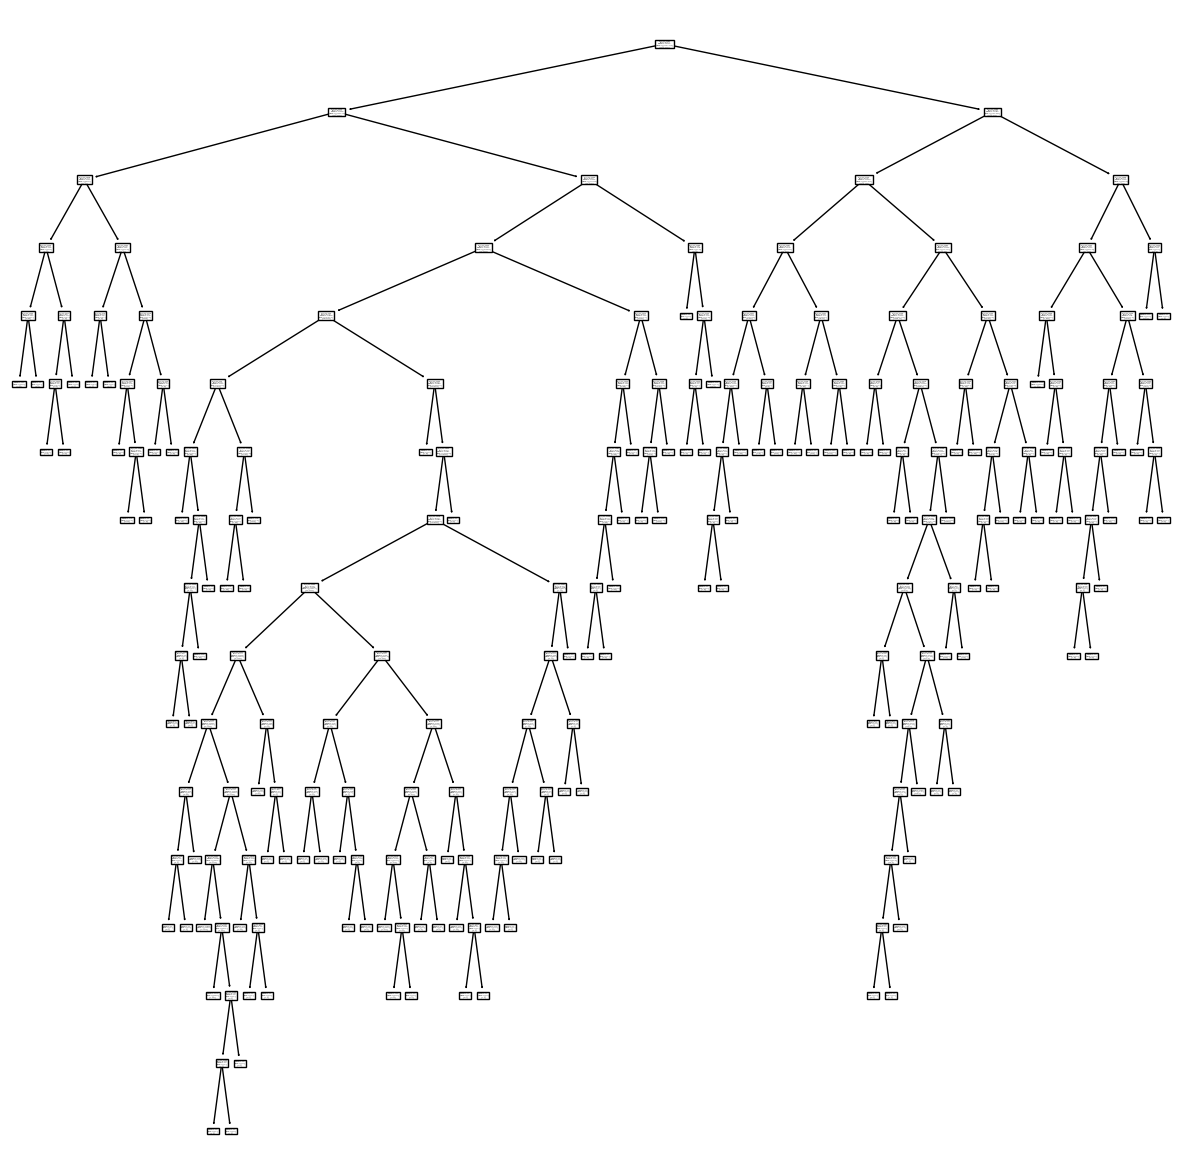

In [40]:
from sklearn import tree
import matplotlib.pyplot as plt 

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
plt.figure(figsize=(15,15))
tree.plot_tree(clf)

In [25]:
model.evaluate(data_test_x, data_test_y)

21/21 [==============================] - 0s 2ms/step - loss: 0.0616


0.061566103249788284